<a href="https://colab.research.google.com/github/paulohenriques7/Atividade-N2---Ambientes-Inteligentes/blob/main/Atividade_N2_Ambientes_Inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="https://faculdadesalvadorarena.org.br/"><img alt="FESA" style="border-width:0" src="https://faculdadesalvadorarena.org.br/wp-content/uploads/2022/07/logo_fesa.png" /></a><br />
**FESA - Eletiva II (2025.1)** <br/>

Alunos(as): </br>

Eliza Eduarda Pereira Barbosa - 082220039 <br/>
Paulo Henrique Alves Silva - 082220016 <br/>
Rodrigo do Vale Sampaio - 062220027 <br/>
Viviane dos Santos de Oliveira - 051240044 <br/>

Data: 05/04/2025 <br/>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

#Atividade N2 - Ambientes Inteligentes

##Explorando o Dataset

Dataset de avaliações de filmes com classificações de até 5 estrelas e marcações de texto livre, voltado para fins educativos e desenvolvimento pessoal.

https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

Importando o Dataset

In [ ]:
links = pd.read_csv('/content/links.csv')
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')
tags = pd.read_csv('/content/tags.csv')

# Questão 1

**A)** Existe alguma correlação entre o ano de lançamento do filme e sua avaliação média (média de ratings)?

R: Não há uma relação significativa entre o ano de lançamento e a avaliação média dos filmes neste conjunto de dados. A correlação de -0,11 é muito fraca para afirmar qualquer padrão relevante, sugerindo que outros fatores devem ser explorados para entender melhor as avaliações.

In [ ]:
#O objetivo do código é calcular as médias das avaliações por filme, extrair o ano e lançamento dos
# filmes e em seguida verificar a correlação estatística entre ano e média de notas.

movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)
media_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
media_ratings.columns = ['movieId', 'avg_rating']
dados = pd.merge(movies, media_ratings, on='movieId')
correlacao = dados[['year', 'avg_rating']].corr().iloc[0,1]
print(f'Correlação entre ano de lançamento e média de avaliação: {correlacao:.3f}')

Correlação entre ano de lançamento e média de avaliação: -0.111


**B)** Qual o grupo mais disperso, o de usuários que avaliaram ou o de usuários que rotularam filmes?

R: O grupo de usuários que aplicaram tags é significativamente mais disperso (CV = 3.39) do que o de usuários que avaliaram filmes (CV = 1.63), com uma distribuição altamente assimétrica de atividade.

In [ ]:
usuarios_unicos_ratings = ratings['userId'].nunique()
usuarios_unicos_tags = tags['userId'].nunique()
print(f"Usuários únicos em avaliações: {usuarios_unicos_ratings}")
print(f"Usuários únicos em tags: {usuarios_unicos_tags}")

Usuários únicos em avaliações: 610
Usuários únicos em tags: 58


In [ ]:
ratings_por_user = ratings.groupby('userId')['movieId'].count()
tags_por_user = tags.groupby('userId')['movieId'].count()

print(f"Média de avaliações por usuário: {ratings_por_user.mean()}")
print(f"Média de tags por usuário: {tags_por_user.mean()}")
print(f"Desvio padrão (avaliações): {ratings_por_user.std()}")
print(f"Desvio padrão (tags): {tags_por_user.std()}")

Média de avaliações por usuário: 165.30491803278687
Média de tags por usuário: 63.5
Desvio padrão (avaliações): 269.4805843871719
Desvio padrão (tags): 215.1181030169568


In [ ]:
cv_ratings = ratings__por_user.std() / ratings__por_user.mean()
cv_tags = tags__por_user.std() / tags__por_user.mean()
print(f"CV das avaliações: {cv_ratings}")
print(f"CV das tags: {cv_tags}")

CV das avaliações: 1.6302030671206205
CV das tags: 3.3876866616843593


**C)** Qual a categoria rotulada mais frequente?

R: O gênero mais frequente é "Drama", aparecendo em 4361 filmes.

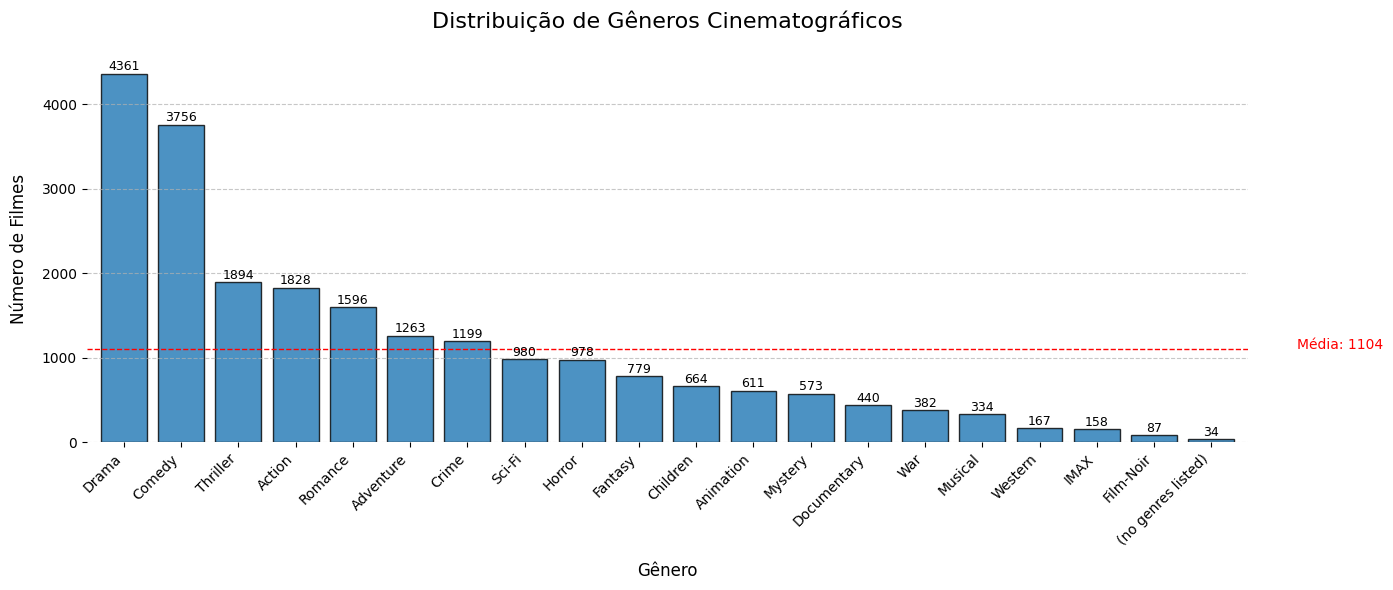

In [ ]:
generos = movies['genres'].str.get_dummies(sep='|')
genero_total = generos.sum().sort_values(ascending=False)

#Grafico
plt.figure(figsize=(14, 6))
ax = genero_total.plot(kind='bar', width=0.8, edgecolor='black', alpha=0.8)

plt.title('Distribuição de Gêneros Cinematográficos', fontsize=16, pad=20)
plt.xlabel('Gênero', fontsize=12, labelpad=10)
plt.ylabel('Número de Filmes', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=9)

mean_val = genero_total.mean()
ax.axhline(mean_val, color='red', linestyle='--', linewidth=1)
ax.text(len(genero_total)+0.5, mean_val+5, f'Média: {mean_val:.0f}', color='red')

plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
print("Drama aparece em", genero_total['Drama'], "filmes.")

Drama aparece em 4361 filmes.


**D)** Como estão distribuídas as avaliações ao longo do tempo?

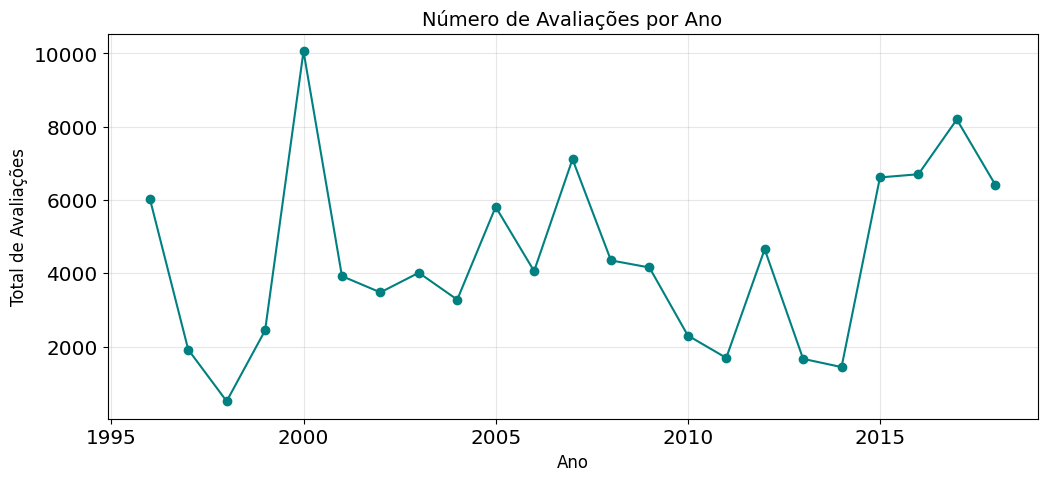

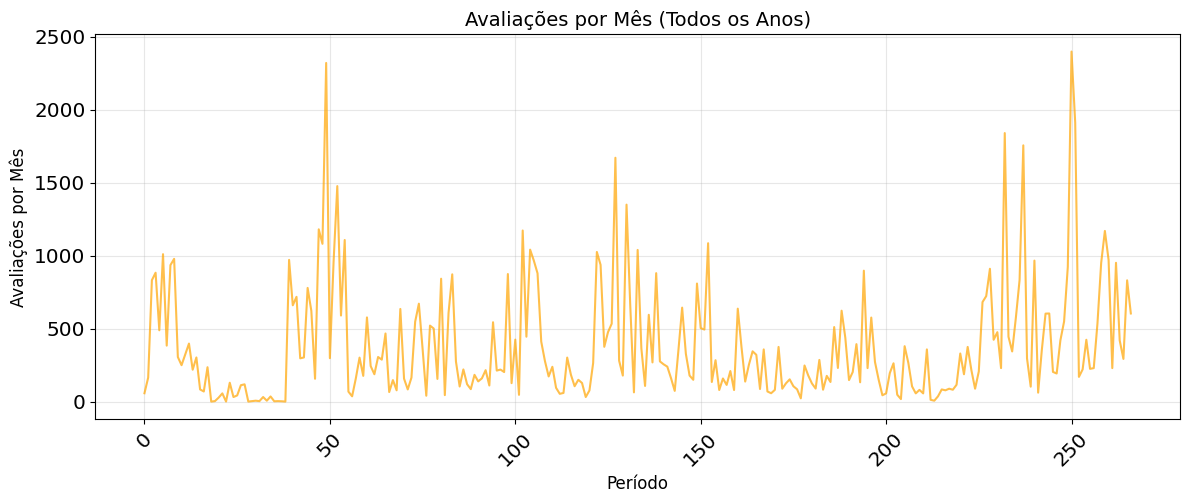

In [ ]:
ratings['date'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Extraindo ano e mês
ratings['year'] = ratings['date'].dt.year
ratings['month'] = ratings['date'].dt.month

# Contando avaliações por ano/mês
ratings_by_year = ratings['year'].value_counts().sort_index()
ratings_by_month = ratings.groupby(['year', 'month']).size().reset_index(name='count')

# Gráfico de avaliações por ano
plt.figure(figsize=(12, 5))
ratings_by_year.plot(marker='o', linestyle='-', color='teal')
plt.title('Número de Avaliações por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Avaliações', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Gráfico de avaliações por mês
plt.figure(figsize=(14, 5))
plt.plot(ratings_by_month.index, ratings_by_month['count'], color='orange', alpha=0.7)
plt.title('Avaliações por Mês (Todos os Anos)', fontsize=14)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Avaliações por Mês', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

# Questão 2

Base de dados **(Ratings)** - Perguntas e Respostas

**A)** Qual é a média geral de avaliação atribuída pelos usuários?

R:  A média geral das avaliações é de 3.50.

In [ ]:
media_geral = ratings['rating'].mean()
print(f'Média geral das avaliações: {media_geral:.2f}')


Média geral das avaliações: 3.50


**B)** Quais filmes (top 5) receberam a maior quantidade de avaliações com nota 1 e quais receberam a maior quantidade de avaliações com nota 5? Expresse graficamente.


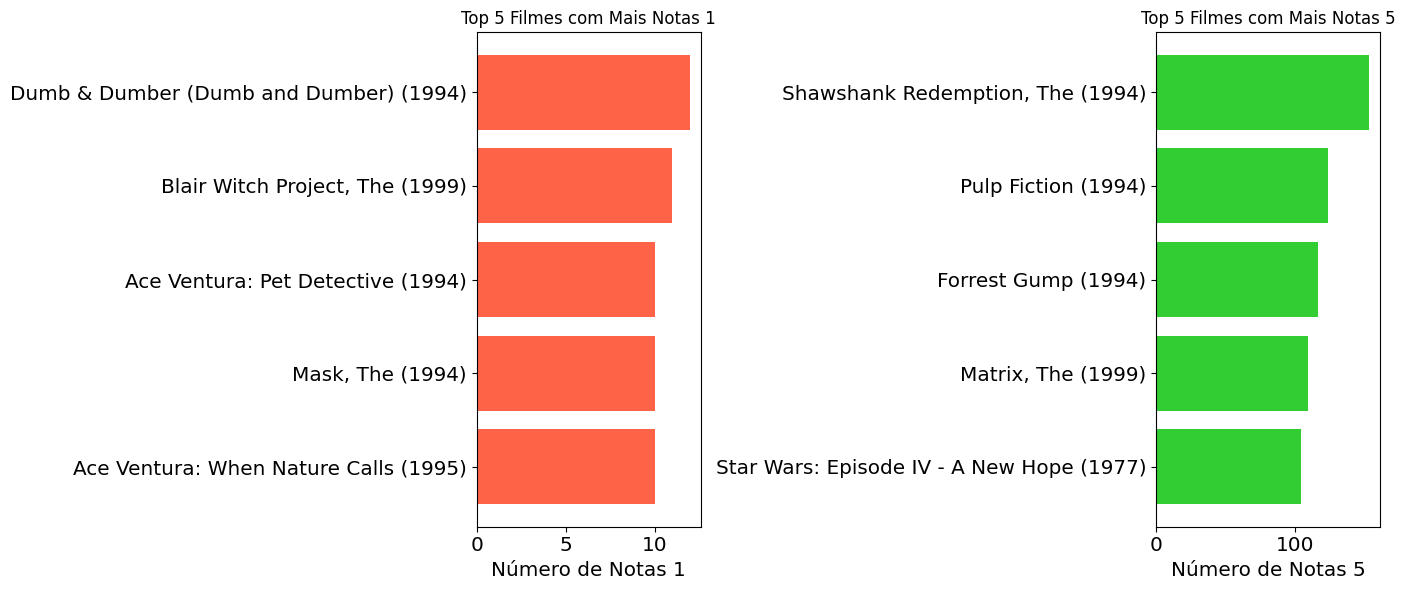

In [ ]:
notas_1 = ratings[ratings['rating'] == 1.0].groupby('movieId').size().reset_index(name='count_1')
notas_5 = ratings[ratings['rating'] == 5.0].groupby('movieId').size().reset_index(name='count_5')
top_1 = notas_1.merge(movies, on='movieId').sort_values('count_1', ascending=False).head(5)
top_5 = notas_5.merge(movies, on='movieId').sort_values('count_5', ascending=False).head(5)

# Gráfico
plt.figure(figsize=(14, 6))

# Gráfico para notas 1
plt.subplot(1, 2, 1)
plt.barh(top_1['title'], top_1['count_1'], color='tomato')
plt.title('Top 5 Filmes com Mais Notas 1', fontsize=12)
plt.xlabel('Número de Notas 1')
plt.gca().invert_yaxis()  # Inverter para o maior ficar em cima

# Gráfico para notas 5
plt.subplot(1, 2, 2)
plt.barh(top_5['title'], top_5['count_5'], color='limegreen')
plt.title('Top 5 Filmes com Mais Notas 5', fontsize=12)
plt.xlabel('Número de Notas 5')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Base de dados **(Links)** - Perguntas e Respostas

**A)** Qual o filme com o maior ID do IMDb?

R: O filme Bungo Stray Dogs: Dead Apple (2018) com ID do IMDb 8391976.0

In [ ]:
max_imdb = links.loc[links['imdbId'].idxmax()]
filme_max_imdb = movies[movies['movieId'] == max_imdb['movieId']]['title'].values[0]

print(f"Filme: {filme_max_imdb} | IMDb ID: {max_imdb['imdbId']}")

Filme: Bungo Stray Dogs: Dead Apple (2018) | IMDb ID: 8391976.0


**B)** Quantos filmes da base possuem mapeamento completo (com IMDb e TMDb)?

R: 9734 filmes possuem mapeamento completo para IMDb e TMDb.

In [ ]:
# Quantos filmes possuem ambos os IDs (IMDb e TMDb não nulos)
mapeamento_completo = links.dropna(subset=['imdbId', 'tmdbId'])
total_completo = len(mapeamento_completo)
total_geral = len(links)

print(f'{total_completo} filmes ({(total_completo/total_geral)*100:.2f}%) possuem mapeamento completo para IMDb e TMDb.')

9734 filmes (99.92%) possuem mapeamento completo para IMDb e TMDb.


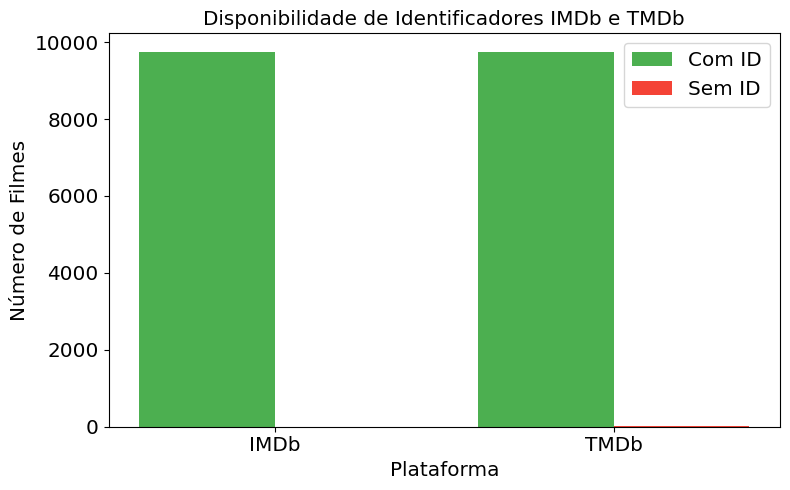

In [ ]:
# Total de filmes
total_filmes = len(links)

# Contagens
com_imdb = links['imdbId'].notna().sum()
sem_imdb = total_filmes - com_imdb

com_tmdb = links['tmdbId'].notna().sum()
sem_tmdb = total_filmes - com_tmdb

# Dados para o gráfico
categorias = ['IMDb', 'TMDb']
com_id = [com_imdb, com_tmdb]
sem_id = [sem_imdb, sem_tmdb]

bar_width = 0.4
index = range(len(categorias))

# Gráfico
plt.figure(figsize=(8,5))
plt.bar(index, com_id, width=bar_width, label='Com ID', color='#4CAF50')
plt.bar([i + bar_width for i in index], sem_id, width=bar_width, label='Sem ID', color='#F44336')

plt.xlabel('Plataforma')
plt.ylabel('Número de Filmes')
plt.title('Disponibilidade de Identificadores IMDb e TMDb')
plt.xticks([i + bar_width/2 for i in index], categorias)
plt.legend()
plt.tight_layout()
plt.show()

Base de dados **(Tags)**  - Perguntas e Respostas

**A)** Qual usuário utilizou mais tags?

R: O usuário com ID 474.


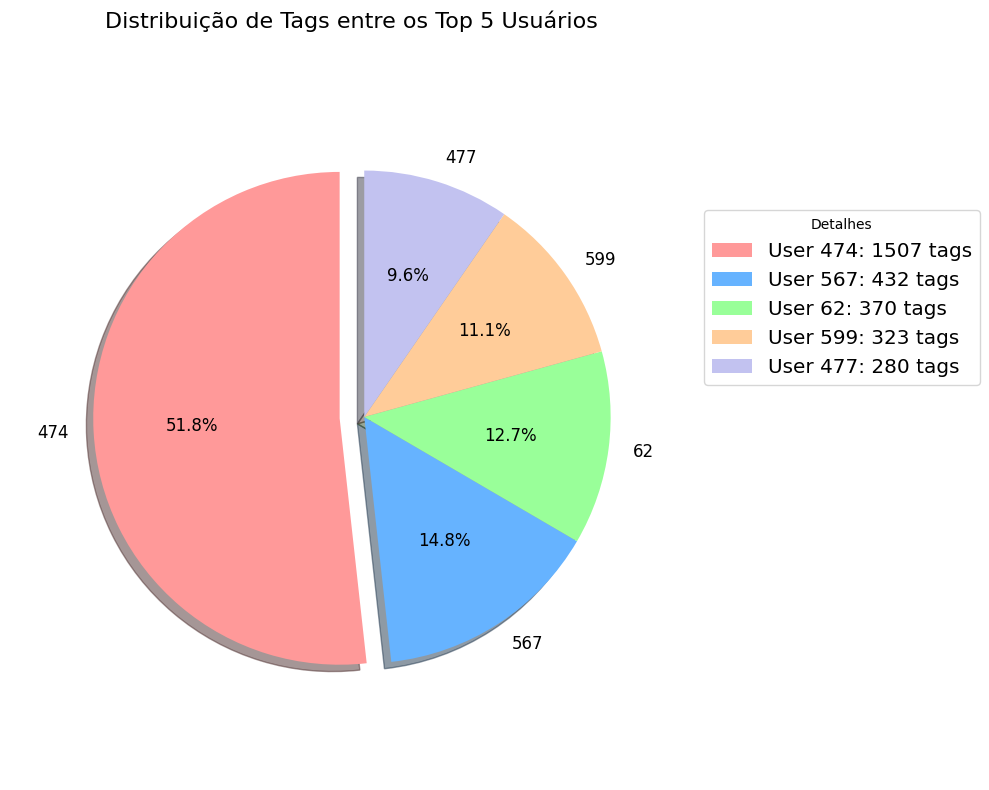

In [ ]:
user_tag_counts = tags['userId'].value_counts().head(5).reset_index()
user_tag_counts.columns = ['userId', 'total_tags']

# Gráfico de pizza
plt.figure(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
explode = (0.1, 0, 0, 0, 0)

plt.pie(
    user_tag_counts['total_tags'],
    labels=user_tag_counts['userId'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12}
)

plt.title('Distribuição de Tags entre os Top 5 Usuários', fontsize=16, pad=20)
plt.axis('equal')

legend_labels = [f"User {id}: {count} tags" for id, count in zip(user_tag_counts['userId'], user_tag_counts['total_tags'])]
plt.legend(legend_labels, title="Detalhes", loc="best", bbox_to_anchor=(1, 0.8))

plt.tight_layout()
plt.show()

**B)** Qual é a tag mais utilizada pelos usuários?

R: A tag mais utilizada pelos usuários é "In netflix queue".

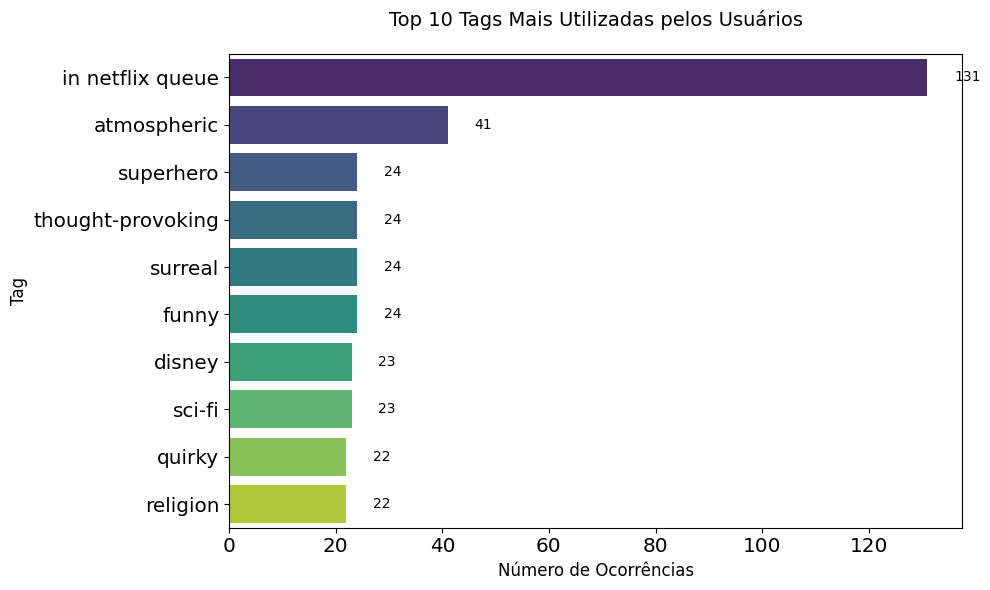

In [ ]:
tags['tag'] = tags['tag'].str.lower()
top_tags = tags['tag'].value_counts().head(10)

# Grafico
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_tags.values,
    y=top_tags.index,
    hue=top_tags.index,
    palette="viridis",
    legend=False,
    dodge=False
)

plt.title('Top 10 Tags Mais Utilizadas pelos Usuários', fontsize=14, pad=20)
plt.xlabel('Número de Ocorrências', fontsize=12)
plt.ylabel('Tag', fontsize=12)


for i, v in enumerate(top_tags.values):
    plt.text(v + 5, i, str(v), color='black', ha='left', va='center')

plt.tight_layout()
plt.show()

Base de dados **(Movies)**  - Perguntas e Respostas

**A)**  Qual e o filme mais antigo listado no dataset?

R: A Trip to the Moon (Voyage dans la Lune, Le) (1902)

In [ ]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)

# Encontrando ano mais antigo e os filmes correspondentes
oldest_year = movies['year'].min()
oldest_movies = movies[movies['year'] == oldest_year]

print(f"Ano mais antigo no dataset: {int(oldest_year)}")
print("\nFilme(s) mais antigo(s):")
print(oldest_movies[['title', 'year']].to_string(index=False))

Ano mais antigo no dataset: 1902

Filme(s) mais antigo(s):
                                               title   year
Trip to the Moon, A (Voyage dans la lune, Le) (1902) 1902.0


**B)** Qual a quantidade de filmes cadastrados?

R: Existem 9742 cadastrados

In [ ]:
total_filmes = movies['movieId'].nunique()

print(f"Quantidade total de filmes cadastrados: {total_filmes}")

Quantidade total de filmes cadastrados: 9742
